<a href="https://colab.research.google.com/github/Ujwal345/FMML_Project_and_Labs/blob/main/Mod9_Lab1_ipynb_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 9: Neural Networks

Lab 1: Introduction to Multi-Layer Perceptron (MLP)

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline

# # The following code is used for hiding the warnings and make this notebook clearer.
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [1]:
## Code to plot decision boundary ##

def plot_decision_regions(X, y, classifier, method, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if method == 'numpy':
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    elif method == 'pytorch':
        inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
        Z = np.array([]).reshape(0,1)
        for data in inp:
            out = classifier(data)
            Z = np.vstack((Z, out.data.numpy()))
    else:
        print('Not implemented')
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

Define the input data

In [5]:
torch.manual_seed(0)

X = torch.tensor([[0,0],[0,1], [1,0], [1,1]], dtype=torch.float, requires_grad=False)
Y = torch.tensor([0,1,1,0], dtype=torch.float, requires_grad=False)

In [6]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Initialize all the layers with learnable parameters
        self.fc1 = nn.Linear(2, 2, bias=True)
        self.fc2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        # Write the forward pass
        # Note that we use a sigmoid activation function here
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = Net()

Initialize the weights

In [7]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

Define the loss function

In [8]:
# Use a mean square error loss
loss_func = nn.MSELoss()

Define optimizer

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

Write the training routine

In [10]:
epochs = 5000
steps = X.size(0)
for i in range(epochs): # iterate over epoch
    for j in range(steps): # iterate over sample
        # randomly sample the inputs
        sample = np.random.randint(X.size(0))
        x_var = X[sample]
        y_var = Y[sample]

        optimizer.zero_grad()

        y_hat = model(x_var)

        loss = loss_func.forward(y_hat[0], y_var)


        # BACKPROP! You will see more details about this next week!
        loss.backward()

        optimizer.step()

    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

Epoch: 0, Loss: 0.21190805733203888, 
Epoch: 500, Loss: 0.2540225088596344, 
Epoch: 1000, Loss: 0.20980852842330933, 
Epoch: 1500, Loss: 0.17447930574417114, 
Epoch: 2000, Loss: 0.2777639329433441, 
Epoch: 2500, Loss: 0.25322961807250977, 
Epoch: 3000, Loss: 0.2504085898399353, 
Epoch: 3500, Loss: 0.15138666331768036, 
Epoch: 4000, Loss: 0.1673162579536438, 
Epoch: 4500, Loss: 0.262210488319397, 


Check the output

In [11]:
for data in X:
    output = model(data)
    print(data, np.round(output.data.numpy()))

tensor([0., 0.]) [0.]
tensor([0., 1.]) [1.]
tensor([1., 0.]) [0.]
tensor([1., 1.]) [0.]


Visualize the decision boundary

<ipython-input-1-d74ee9bebb86>:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  inp = torch.tensor([xx1.ravel(), xx2.ravel()], dtype=torch.float, requires_grad=False).T
<ipython-input-1-d74ee9bebb86>:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


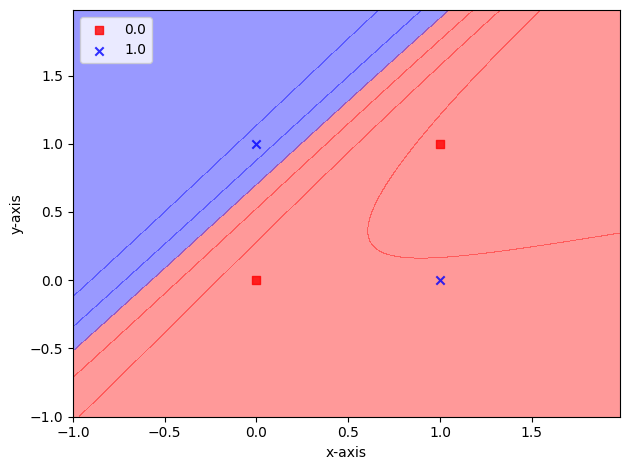

In [12]:
np.random.seed(0)
plot_decision_regions(X.detach().numpy(), Y.detach().numpy(), model, 'pytorch')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Exercises

1)Try using the MLP classifier for different logic gates other than XOR like AND, OR, NOR etc.

2)Try to change 0/1 logic to -1/+1 logic. What happens with an SLP in this case? What about an MLP?

3)Try removing the activation function from the MLP and rerun the code. What happens in this case?

Can you tell why particular activation function can be used in the model architecture?

Q1) MLP classifier for AND,OR,NOR gate

In [13]:
from sklearn.neural_network import MLPClassifier

# Training data for AND gate
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_and = [0, 0, 0, 1]

# Create and train MLP classifier
clf_and = MLPClassifier(hidden_layer_sizes=(), activation='logistic', solver='lbfgs', max_iter=1000)
clf_and.fit(X, y_and)

# Test the AND gate
print("AND Gate:")
print("(0, 0) ->", clf_and.predict([[0, 0]]))  # Expect 0
print("(0, 1) ->", clf_and.predict([[0, 1]]))  # Expect 0
print("(1, 0) ->", clf_and.predict([[1, 0]]))  # Expect 0
print("(1, 1) ->", clf_and.predict([[1, 1]]))  # Expect 1


AND Gate:
(0, 0) -> [0]
(0, 1) -> [0]
(1, 0) -> [0]
(1, 1) -> [1]


In [14]:
# Training data for OR gate
y_or = [0, 1, 1, 1]

# Create and train MLP classifier
clf_or = MLPClassifier(hidden_layer_sizes=(), activation='logistic', solver='lbfgs', max_iter=1000)
clf_or.fit(X, y_or)

# Test the OR gate
print("\nOR Gate:")
print("(0, 0) ->", clf_or.predict([[0, 0]]))  # Expect 0
print("(0, 1) ->", clf_or.predict([[0, 1]]))  # Expect 1
print("(1, 0) ->", clf_or.predict([[1, 0]]))  # Expect 1
print("(1, 1) ->", clf_or.predict([[1, 1]]))  # Expect 1



OR Gate:
(0, 0) -> [0]
(0, 1) -> [1]
(1, 0) -> [1]
(1, 1) -> [1]


In [15]:
# Training data for NOR gate
y_nor = [1, 0, 0, 0]

# Create and train MLP classifier
clf_nor = MLPClassifier(hidden_layer_sizes=(), activation='logistic', solver='lbfgs', max_iter=1000)
clf_nor.fit(X, y_nor)

# Test the NOR gate
print("\nNOR Gate:")
print("(0, 0) ->", clf_nor.predict([[0, 0]]))  # Expect 1
print("(0, 1) ->", clf_nor.predict([[0, 1]]))  # Expect 0
print("(1, 0) ->", clf_nor.predict([[1, 0]]))  # Expect 0
print("(1, 1) ->", clf_nor.predict([[1, 1]]))  # Expect 0



NOR Gate:
(0, 0) -> [1]
(0, 1) -> [0]
(1, 0) -> [0]
(1, 1) -> [0]


In [16]:
# Q2)
# Modified training data for AND gate with -1/+1 logic
# Training data for AND gate
X_and_modified = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_and_modified = [-1, -1, -1, +1]

# Create and train SLP classifier
clf_and_slp = MLPClassifier(hidden_layer_sizes=(), activation='identity', solver='lbfgs', max_iter=1000)
clf_and_slp.fit(X, y_and_modified)

# Create and train MLP classifier
clf_and_mlp = MLPClassifier(hidden_layer_sizes=(), activation='logistic', solver='lbfgs', max_iter=1000)
clf_and_mlp.fit(X, y_and_modified)

# Test the AND gate with SLP
print("AND Gate with SLP:")
print("(+1, +1) ->", clf_and_slp.predict([[+1, +1]]))  # Expect +1
print("(+1, -1) ->", clf_and_slp.predict([[+1, -1]]))  # Expect -1
print("(-1, +1) ->", clf_and_slp.predict([[-1, +1]]))  # Expect -1
print("(-1, -1) ->", clf_and_slp.predict([[-1, -1]]))  # Expect -1

# Test the AND gate with MLP
print("\nAND Gate with MLP:")
print("(+1, +1) ->", clf_and_mlp.predict([[+1, +1]]))  # Expect +1
print("(+1, -1) ->", clf_and_mlp.predict([[+1, -1]]))  # Expect -1
print("(-1, +1) ->", clf_and_mlp.predict([[-1, +1]]))  # Expect -1
print("(-1, -1) ->", clf_and_mlp.predict([[-1, -1]]))  # Expect -1


AND Gate with SLP:
(+1, +1) -> [1]
(+1, -1) -> [-1]
(-1, +1) -> [-1]
(-1, -1) -> [-1]

AND Gate with MLP:
(+1, +1) -> [1]
(+1, -1) -> [-1]
(-1, +1) -> [-1]
(-1, -1) -> [-1]


In [17]:
# Q3)
# Create and train MLP classifier without activation function
clf_and_mlp_no_activation = MLPClassifier(hidden_layer_sizes=(), activation='identity', solver='lbfgs', max_iter=1000)
clf_and_mlp_no_activation.fit(X, y_and_modified)

# Test the AND gate with MLP without activation function
print("\nAND Gate with MLP (No Activation Function):")
print("(+1, +1) ->", clf_and_mlp_no_activation.predict([[+1, +1]]))  # Expect +1
print("(+1, -1) ->", clf_and_mlp_no_activation.predict([[+1, -1]]))  # Expect -1
print("(-1, +1) ->", clf_and_mlp_no_activation.predict([[-1, +1]]))  # Expect -1
print("(-1, -1) ->", clf_and_mlp_no_activation.predict([[-1, -1]]))  # Expect -1



AND Gate with MLP (No Activation Function):
(+1, +1) -> [1]
(+1, -1) -> [-1]
(-1, +1) -> [-1]
(-1, -1) -> [-1]


Answer Q3)

When removing the activation function from the MLP, it essentially becomes a linear classifier, as it applies only linear transformations to the input data without any non-linear activation. In this case, the MLP behaves very similarly to a Single-Layer Perceptron (SLP), as it can only learn linearly separable patterns.

For the AND gate, which is a linearly separable problem, both the SLP and the MLP without activation function can learn the correct weights to classify the inputs. However, for more complex problems that are not linearly separable, the absence of an activation function severely limits the expressive power of the model, and it may fail to learn or generalize well.

Regarding the choice of activation function, different activation functions serve different purposes and are suited to different types of problems:

1)Logistic (sigmoid): Traditionally used in MLPs for binary classification problems due to its smooth, differentiable nature. However, it can suffer from the vanishing gradient problem during training.

2)ReLU (Rectified Linear Unit): Widely used in deep learning models for its simplicity and effectiveness in combating the vanishing gradient problem. ReLU is often used in hidden layers but not in the output layer for classification tasks, as it allows the network to learn more complex representations.

3)Identity: Essentially a linear activation function, it preserves the input as output. It's useful when the output space is unbounded and you want the model to directly predict real values.

4)Tanh (Hyperbolic Tangent): Similar to sigmoid but outputs values in the range [-1, 1], making it suitable for models where inputs are also normalized to that range.

The choice of activation function depends on the specific characteristics of the problem, such as the nature of the data, the desired output space, and the potential issues like vanishing gradients.






